<a href="https://colab.research.google.com/github/Dorra2021/algo_Gradient_Descent/blob/main/linear_regression_descente_de_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive
drive.mount("drive/")

Mounted at drive/


In [2]:
os.chdir("drive/My Drive/RNN")

In [3]:
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn

In [4]:
df = pandas.read_csv("number of travelers.csv")

In [5]:
df.head()

,month,passengers
0,2000-01-01,46492
1,2000-02-01,48526
2,2000-03-01,58764
3,2000-04-01,56033
4,2000-05-01,58201


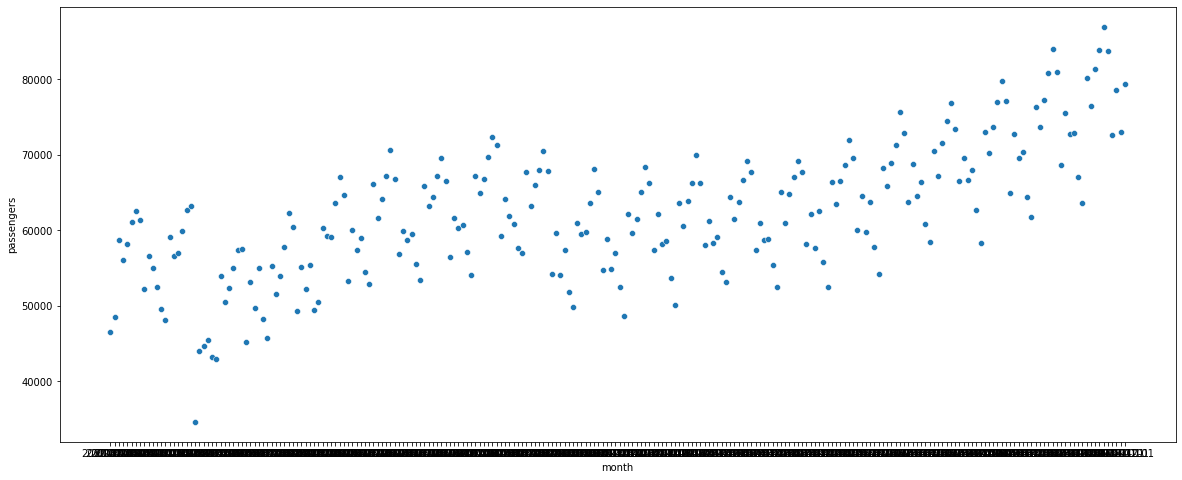

In [6]:
plt.figure(figsize=(20, 8))
seaborn.scatterplot(x="month", y="passengers", data=df)
plt.show()

In [7]:
index_split = len(df)*0.8
df_train = df.loc[:index_split]
df_test = df.loc[index_split:]

In [8]:
t_train = [index for index in range(len(df_train))]
t_test = [index for index in range(len(df_test))]

y_train = df_train["passengers"].values
y_test = df_test["passengers"].values

## Linear regression using Gradient Descent

In [13]:
#cette fct elle prend un temps et elle nous renvois le nombre des passagers
def predict(t):
  return coeff[0]*t + coeff[1]

In [14]:
def loss(predictions, y):
  dataset_length = len(predictions)
  return (1/2*dataset_length) * sum([(predictions[index_value] - y_train[index_value])**2 for index_value in range(dataset_length)])

In [15]:
#on va parcourir les epoch
#map applique une fct à chaque element d'une liste
def gradient_descent(t_train, y_train, coeff,epochs=200000, learning_rate=0.0001):
  dataset_length = len(t_train)

  for index_epoch in range(epochs):
    predictions = list(map(predict, t_train))

    dloss_da = (1/dataset_length)*numpy.sum([(predictions[t] - y_train[t])*t for t in range(dataset_length)])
    dloss_db = (1/dataset_length)*numpy.sum([(predictions[t] - y_train[t]) for t in range(dataset_length)])

    coeff[0] = coeff[0] - learning_rate*dloss_da#   a
    coeff[1] = coeff[1] - learning_rate*dloss_db#   b
    
    if index_epoch % 10000 == 0:
      print(f"loss = {loss(predictions, y_train)}")

#on va appliquer à chaque element de t train la fct predict
    #on va coder la derivée partielle par rapport à a et par rapport à b


In [16]:
coeff = [0, 0]
gradient_descent(t_train, y_train, coeff)
print("y={:.3f} t + {:.3f}".format(coeff[0], coeff[1]))

loss = 67176298112470.0
loss = 8907508351719.172
loss = 5648152315672.873
loss = 3678892420402.4463
loss = 2489091584828.648
loss = 1770229624692.258
loss = 1335902716960.6958
loss = 1073488132185.8281
loss = 914940703793.1725
loss = 819148440297.2897
loss = 761272019098.3115
loss = 726303849346.844
loss = 705176542743.6484
loss = 692411702962.8259
loss = 684699355256.126
loss = 680039656570.486
loss = 677224328130.089
loss = 675523343847.187
loss = 674495631595.5178
loss = 673874701418.2953
y=62.771 t + 53548.017


In [17]:
t_mean = numpy.mean(t_train)
y_mean = numpy.mean(y_train)

a = numpy.sum([(t_train[index_value] - t_mean) * (y_train[index_value]- y_mean) for index_value in range(len(t_train))]) / numpy.sum([(t_train[index_value] - t_mean)**2 for index_value in range(len(t_train))])

b = y_mean - a * t_mean
print(a, b)

60.048356457988355 53897.35778003312


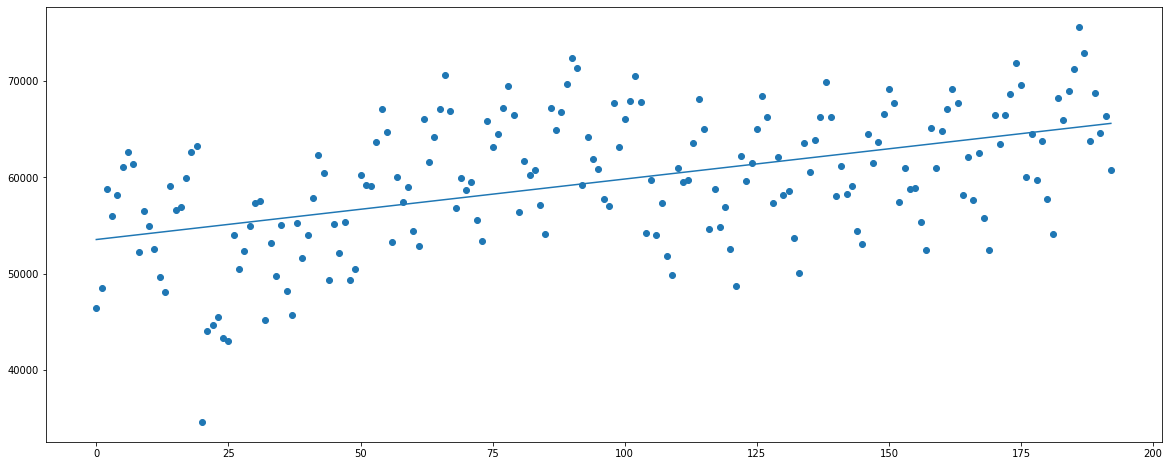

In [18]:
plt.figure(figsize=(20, 8))
plt.scatter(t_train, y_train)
plt.plot(t_train, list(map(predict, t_train)))
plt.show()